## Import Packages / Load Images

In [32]:
import os, sys, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import PIL.Image as Image
from IPython.display import Image as IPImage

In [33]:
original = np.array(Image.open("/Users/pkr/Codebase/research/phenotyping/pennycressUNet/data/input_image.png")) / 255
mask = np.array(Image.open("/Users/pkr/Codebase/research/phenotyping/pennycressUNet/data/mask_image.png")) / 255

In [34]:
# remove white bg from mask
mask[mask.sum(axis=2) == 3] = 0
mask = mask

In [35]:
def mask_viz(image, mask, mask_alpha = 0.5, outlines = False):
  """
  Function to overlay mask on image

  Parameters:
  image (np.array): image to overlay mask on
  mask (np.array): mask to overlay on image
  mask_alpha (float): alpha value for mask overlay
  outlines (bool): whether to draw outlines on mask

  Returns:
  masked_image (np.array): image with mask overlay
  """

  # create outlines on each border

  image = image.astype(np.float64)
  mask = mask.astype(np.float64)

  if outlines:
  # create outlines on each border
    outlines = np.zeros_like(mask)
    for i in range(mask.shape[2]):
        channel = np.uint8(mask[:, :, i])
        outlines[:, :, i] = cv2.Canny(channel, 0, 1)

    outlines = np.expand_dims(np.where(outlines.sum(2) > 0 , 255, 0), -1)
    outlines = np.where(outlines > 0, 
                        (mask * 255),
                        0)
    outlines = np.uint8(outlines) / 255

  # loop through mask channels
  overlay = np.where(mask > 0,
                     mask,
                     image)

  # convert to float
  overlay = overlay.astype(np.float64)

  # weighted image
  weighted_image = cv2.addWeighted(image, (1 - mask_alpha), overlay, mask_alpha, 0)

  weighted_image = np.where(outlines > 0,
                            outlines,
                            weighted_image)

  return weighted_image

MovieWriter ffmpeg unavailable; using Pillow instead.


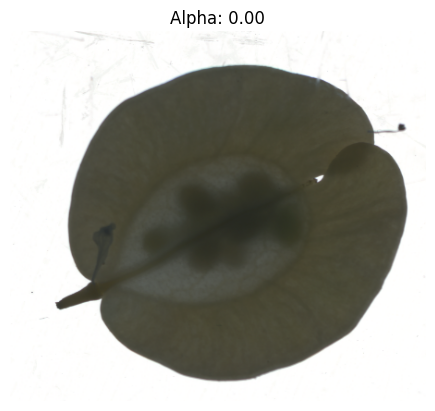

In [36]:
# options
num_frames = 20
f = r'mask_animation.gif'

fig, ax = plt.subplots(1,1)
ax.imshow(masked_image[350:750, 500:950])

# write a function animate, updating mask_viz with increasing alpha
def animate(frame):
    alpha = frame / num_frames
    masked_image = mask_viz(original, mask, mask_alpha=alpha)

    # clear axis
    ax.clear()
    ax.axis('off')
    ax.imshow(masked_image[350:750, 500:950])
    ax.set_title(f"Alpha: {alpha:.2f}")

anim = animation.FuncAnimation(fig, animate, frames=num_frames, interval=10000000)
anim.save(f, fps=10)
